In [1]:
project_root_path = '/home/bob/projects/Web3HackerNetwork'

In [4]:
import sys
bob_lib_path = project_root_path + "/sandbox/python/bob/"
sys.path.append(bob_lib_path)

import commit_stat_engineering
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

In [6]:
complex_stats = [stat for stat in all_stats
                 if stat['rustFiles'] > 0 and stat['markdownFiles'] > 0
                 and stat['javascriptFiles'] > 0 and stat['jsonFiles'] > 0
                 and stat['binBytes'] > 0]

print(json.dumps(complex_stats[0], indent=2))

{
  "commit": "5629c4b1eae0d9db3dd25e5ada2d91393005a3d0",
  "totalFiles": 851,
  "binFiles": 62,
  "textFiles": 789,
  "binBytes": 7329844,
  "textLines": 402917,
  "totalBytes": 19417354,
  "pctBinBytes": 37.74,
  "pctTextBytes": 62.25,
  "javascriptFiles": 114,
  "javascriptLines": 9928,
  "javascriptFilePct": 13.39,
  "javascriptLinePct": 2.46,
  "javascriptBytePct": 1.53,
  "rustFiles": 209,
  "rustLines": 8440,
  "rustFilePct": 24.55,
  "rustLinePct": 2.09,
  "rustBytePct": 1.3,
  "markdownFiles": 36,
  "markdownLines": 5858,
  "markdownFilePct": 4.23,
  "markdownLinePct": 1.45,
  "markdownBytePct": 0.9,
  "jsonFiles": 141,
  "jsonLines": 369338,
  "jsonFilePct": 16.56,
  "jsonLinePct": 91.66,
  "jsonBytePct": 57.06,
  "imgFiles": 48,
  "imgBytes": 7160304,
  "imgFilePct": 5.64,
  "imgBytePct": 36.87,
  "lockFiles": 0,
  "lockLines": 0,
  "lockFilePct": 0,
  "lockLinePct": 0,
  "lockBytePct": 0,
  "yarnFiles": 3,
  "yarnLines": 233,
  "yarnFilePct": 0.35,
  "yarnLinePct": 0.05,
  

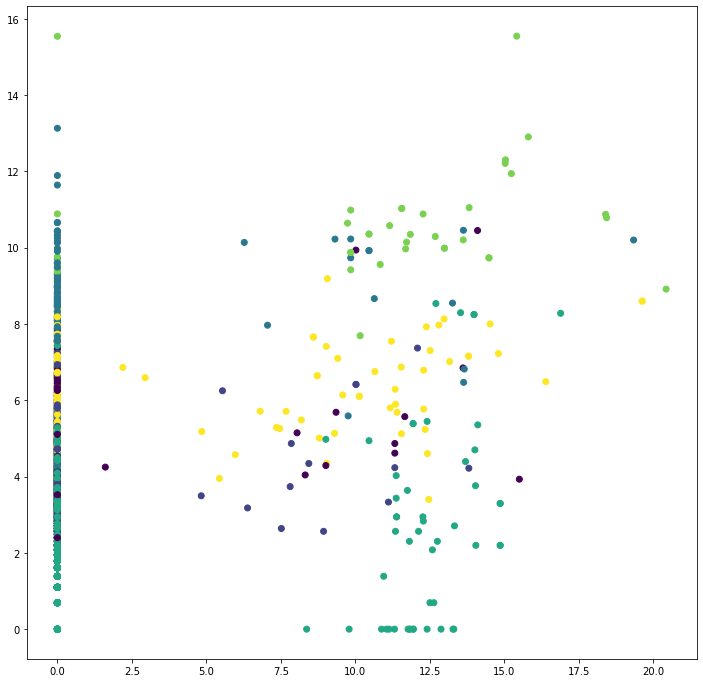

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

num_clusters = 6

plt.figure(figsize=(12,12))

X = [[np.log1p(stat['javascriptLines']),
      np.log1p(stat['rustLines']),
      np.log1p(stat['markdownLines']),
      np.log1p(stat['jsonLines']),
      #np.log1p(stat['imgBytes']),
      np.log1p(stat['lockLines']),
      np.log1p(stat['yarnLines']),
      np.log1p(stat['htmlLines'])] for stat in all_stats]
#print(X)

random_state = 8675309
y_pred = KMeans(n_clusters=num_clusters, random_state = random_state).fit_predict(X)

x_values = [np.log1p(stat['binBytes']) for stat in all_stats]
y_values = [np.log1p(stat['textLines']) for stat in all_stats]

plt.scatter(x_values, y_values, c=y_pred)
plt.show()

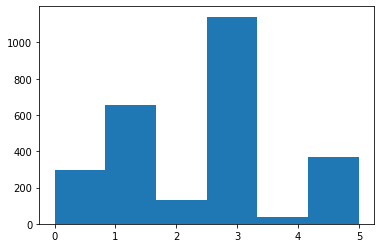

In [8]:
plt.hist(y_pred, num_clusters)
plt.show()

In [10]:
for i in range(0, len(y_pred)):
    all_stats[i]['cluster'] = y_pred[i]
    
clusters = [i for i in range(0, num_clusters)]
for i in range(0, num_clusters):
    clusters[i] = [stats for stats in all_stats if stats['cluster'] == i]


In [11]:
import numpy as np
show = ['binFiles', 'textFiles', 'binBytes', 'textLines', 'javascriptBytePct', 'rustBytePct',
       'markdownBytePct', 'jsonBytePct', 'imgBytePct', 'lockBytePct', 'yarnBytePct', 'htmlBytePct']
for i in range(0, len(clusters)):
    print("cluster: " + str(i) + " (" + str(len(clusters[i])) + " elements)")
    for field in show:
        print(field + ": " + str(np.median([stats[field] for stats in clusters[i]])))
    print()


cluster: 0 (295 elements)
binFiles: 0.0
textFiles: 3.0
binBytes: 0.0
textLines: 85.0
javascriptBytePct: 100.0
rustBytePct: 0.0
markdownBytePct: 0.0
jsonBytePct: 0.0
imgBytePct: 0.0
lockBytePct: 0.0
yarnBytePct: 0.0
htmlBytePct: 0.0

cluster: 1 (654 elements)
binFiles: 0.0
textFiles: 4.0
binBytes: 0.0
textLines: 56.0
javascriptBytePct: 0.0
rustBytePct: 100.0
markdownBytePct: 0.0
jsonBytePct: 0.0
imgBytePct: 0.0
lockBytePct: 0.0
yarnBytePct: 0.0
htmlBytePct: 0.0

cluster: 2 (131 elements)
binFiles: 0.0
textFiles: 8.0
binBytes: 0.0
textLines: 4920.0
javascriptBytePct: 1.4
rustBytePct: 0.0
markdownBytePct: 0.0
jsonBytePct: 96.24
imgBytePct: 0.0
lockBytePct: 0.0
yarnBytePct: 0.0
htmlBytePct: 0.0

cluster: 3 (1142 elements)
binFiles: 0.0
textFiles: 1.0
binBytes: 0.0
textLines: 6.0
javascriptBytePct: 0.0
rustBytePct: 0.0
markdownBytePct: 0.0
jsonBytePct: 0.0
imgBytePct: 0.0
lockBytePct: 0.0
yarnBytePct: 0.0
htmlBytePct: 0.0

cluster: 4 (40 elements)
binFiles: 3.0
textFiles: 48.0
binBytes: 104